In [10]:
import os
import subprocess
import sys
sys.path.append('../sdpm_py_util')
sys.path.append('../web_util')
import plotting_functions as pltfuns
import netCDF4 as nc
import web_functions as webfuns
import matplotlib.pyplot as plt
import numpy as np

In [7]:

fn_grd = '/scratch/PFM_Simulations/Grids/GRID_SDTJRE_LV4_mss_oct2024.nc'
fn_his = '/scratch/PFM_Simulations/LV4_Forecast/His/LV4_ocean_his_202504110000.nc'
fn_web = '/scratch/PFM_Simulations/LV4_Forecast/His/web_data_2025041100.nc'


In [9]:
ds = nc.Dataset(fn_web)
print(ds.variables.keys())

dict_keys(['shoreline_dye_tot', 'shoreline_risk', 'map_dye_tot', 'sites_dye_tot', 'sites_risk', 'map_lat', 'map_lon', 'shoreline_lat', 'shoreline_lon', 'time', 'sites_lat', 'sites_lon'])


In [ ]:
dye,shore,sites = webfuns.full_his_to_essential(fn_his,fn_grd)


(1060, 1)


/home/mspydell/models/PFM_root/PFM/web_util/../sdpm_py_util/plotting_functions.py:2304: RuntimeWarning: divide by zero encountered in log10
  l10dyeTot = np.log10( dyeTot )


In [12]:

cmd_list = ['python','-W','ignore','web_functions.py','full_his_to_essential',fn_his,fn_grd]
os.chdir('../web_util')
ret6 = subprocess.run(cmd_list)   
print('...done making web nc file: ' + str(ret6.returncode) + ' (0=good)') 

(1060, 1)
...done making web nc file: 0 (0=good)


/tmp/ipykernel_982370/4170582570.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.contourf(dye['Lon'],dye['Lat'],np.log10( dye['Dye_tot'][3,:,:] ),levels=35)


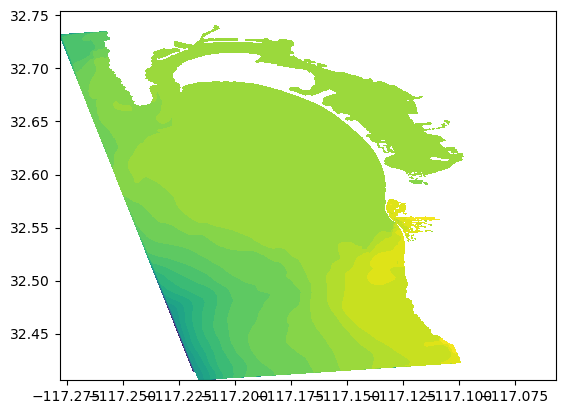

In [12]:
fig, ax = plt.subplots()
ax.contourf(dye['Lon'],dye['Lat'],np.log10( dye['Dye_tot'][3,:,:] ),levels=35)
